## Проект по анализу продаж компьютерных игр.

Описание проекта
Проект о продажах по всему миру компьютерных игр. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В результате нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Анализируются данные до 2016 года. Представим, что сейчас декабрь 2016 г., мы планируем кампанию на 2017-й и главное назначение проекта -  отработать принцип работы с данными.

Цель исследования: на материале анализа исходных данных определить, как спланировать рекламные компании при продажах компьютерных игр на 2017 год

Суть исследования: определить критерии успешности тех или иных игр

Задачи исследования:

1) проанализировать исходные данные,

2) проверить на аномалии и убрать их, преобразовать данные в нужные типы.

3) Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.

4) Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

5) определить для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Описать различия в долях продаж.
   
6)  определить для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5). Пояснить разницу.

7)  определить для пользователя каждого региона (NA, EU, JP): Влияет ли рейтинг ESRB на продажи в отдельном регионе?

8) проверить гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

9) проверить гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Описание данных
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime as dt
games = pd.read_csv('/datasets/games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Подготовила данные, заменив названия столбцов (привела к нижнему регистру для удобства пользования);

In [2]:
games.columns = games.columns.str.lower() # изменим названия столбцов
print(games.columns)
# приведем к нижнему регистру данные в следующих столбцах:
for column in games[['name','platform','genre','rating']]:
    games[column] = games[column].str.lower()
games.sample(10) 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1554,road rash,ps,1995.0,racing,0.71,0.48,0.00,0.08,NaN,NaN,NaN
15589,elven legacy,pc,2009.0,strategy,0.02,0.00,0.00,0.00,71.0,7.1,t
4718,james patterson women's murder club: games of ...,ds,2009.0,adventure,0.15,0.22,0.00,0.05,53.0,tbd,t
15429,rinne no lagrange: kamogawa days,ps3,2012.0,adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
9621,dreamworks super star kartz,ds,2011.0,racing,0.08,0.03,0.00,0.01,NaN,tbd,e
10118,transformer: rise of the dark spark,xone,2014.0,action,0.07,0.03,0.00,0.01,NaN,NaN,NaN
13092,the bureau: xcom declassified,pc,2013.0,shooter,0.00,0.05,0.00,0.00,66.0,6.5,m
11740,aikatsu! my no.1 stage!,3ds,2015.0,misc,0.00,0.00,0.08,0.00,NaN,NaN,NaN
5473,sniper: ghost warrior 2,ps3,2013.0,shooter,0.05,0.18,0.03,0.07,52.0,6,m
4847,command & conquer,ps,1996.0,strategy,0.22,0.15,0.00,0.03,NaN,NaN,NaN


Преобразование данных в нужные для дальнейшей работы типы.

In [3]:
print(games.info())
#поменяем пропуски в годах там, где есть возможность понять по названию игры
for i in games[games['year_of_release'].isnull() == True].index:  
    games['year_of_release'][i] = games.loc[games['name'] == games['name'][i], 'year_of_release'].max()
print(games['year_of_release'].isna().sum())
# оставшиеся заменим нулями, исключим эти 146 строк из таблицы и поменяем тип данных
games['year_of_release'] = games['year_of_release'].fillna(0)
games = games.query('year_of_release != 0')
games['year_of_release'] = games['year_of_release'].astype('int')
print(games['user_score'].value_counts()) #поскольку оказалось большое число в этом столбце с tbd - "to be determined" 
#то пока не будем менять тип данных, сначала поменяем их на ΝαΝ
games['rating'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


/tmp/ipykernel_53/3444706632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['year_of_release'][i] = games.loc[games['name'] == games['name'][i], 'year_of_release'].max()


146
tbd    2394
7.8     324
8       288
8.2     279
8.3     253
       ... 
9.6       2
0.9       2
1.1       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


e       3958
t       2930
m       1554
e10+    1412
ec         8
k-a        3
rp         2
ao         1
Name: rating, dtype: int64

Обработала пропуски: 

In [4]:
display(games[games['genre'].isnull() == True].head())
display(games[games['platform'] =='GEN'].head(30))
#Поскольку в 1993 году у этой платформы выходил целый ряд игр, то восстановить пропуски в названии и в жанре нет возможности,
#но поскольку это всего две строки, то их можно просто удалить
display(games.isna().sum())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8494
user_score         6635
rating             6701
dtype: int64

Удалим строки с пустым значением в столбце 'name', так как их всего две. Они не изменят общую статистическую картину.
в трех столбцах удалять пропуски не будем, заменим на 0 в тех случаях, когда это потребуется для анализа:

critic_score       8578

user_score         6701

rating             6766

In [5]:
games['name'] = games['name'].fillna(0)
games = games.query('name != 0')
games['critic_score'] = games['critic_score'].fillna(0)

In [6]:
games.duplicated().sum()

0

Дубликатов не имеется

Описание причин, которые могли привести к пропускам

Поскольку большая часть пропусков в тех столбцах, которые зависят от мнения пользователей, то часть из них объясняется тем фактом, что игру купило не так много людей или вовсе не купило, так игра осталась без оценки. Или купившие ее, как и критики не определились с оценкой.
в графе rating помещается рейтинг от ESRB (была основана в 1994 году) - соответственно, с 1980 по 1993 пропуски в этой графе связаны с тем, что в эти годы не было такой организации. Невозможно дать рейтинг игре, посчитав его как среднее рейтингов игр того же жанра. Можно поставить рейтинг "No ESRB", проверим нашу гипотезу

In [7]:
display(games.loc[games['year_of_release'] < 1994])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,0.0,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,0.0,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,0.0,NaN,NaN
18,super mario world,snes,1990,platform,12.78,3.75,3.54,0.55,0.0,NaN,NaN
21,super mario land,gb,1989,platform,10.83,2.71,4.18,0.42,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14610,doom,pc,1992,shooter,0.02,0.00,0.00,0.00,85.0,8.2,m
14621,simcity,pc,1988,simulation,0.00,0.02,0.00,0.01,64.0,2.2,e10+
15692,empire deluxe,pc,1992,strategy,0.02,0.00,0.00,0.00,0.0,NaN,NaN
15957,strongest tokyo university shogi ds,ds,1985,action,0.00,0.00,0.02,0.00,0.0,NaN,NaN


Однако, оказалось, что некоторые популярные у критиков игры, несмотря на появление до 1994 года, получили рейтинг. Так что замена на "No ESRB" будет некорректна. 

Обратила внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей и разобралась с его особенностями для дальнейшей работы. Как мы выяснили: tbd - "to be determined", to be done. Пишется тогда, когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации. То есть, данные были специально не заполнены, поскольку пользователи не определились с рейтингом, поменяем его на NaN

In [8]:
games.loc[games['rating'] =='tbd'].head(30)
games['user_score'] = games['user_score'].replace("tbd", np.NaN)
# Приведем годы и оценки критиков в целочисленный тип
games['critic_score'] = games['critic_score'].astype('int')
# Оценки пользователей приведем к типу float
games['user_score'] = games['user_score'].fillna(0)
games['user_score'] = games['user_score'].astype('float64')

In [9]:
#Посмотрим, какие жанры игр и нет ли повторений
games['genre'].value_counts()

action          3342
sports          2333
misc            1735
role-playing    1484
shooter         1311
adventure       1294
racing          1236
platform         879
simulation       860
fighting         842
strategy         678
puzzle           573
Name: genre, dtype: int64

Посчитала суммарные продажи во всех регионах и записала их в отдельный столбец.

In [10]:
# Добавим столбец total_sales с суммарными продажами
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,0,0.0,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,0,0.0,NaN,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,0,0.0,NaN,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89,8.5,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58,6.6,e,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87,8.4,e,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,0,0.0,NaN,28.31


Проведем исследовательский анализ данных, выясним, сколько игр выпускалось в разные годы. Нужно ли учитывать данные за все периоды?

,total_sales,name
year_of_release,,
1980,11.38,9
1981,35.68,46
1982,28.88,36
1983,16.80,17
1984,50.35,14
1985,53.95,14
1986,37.08,21
1987,21.70,16
1988,47.21,15


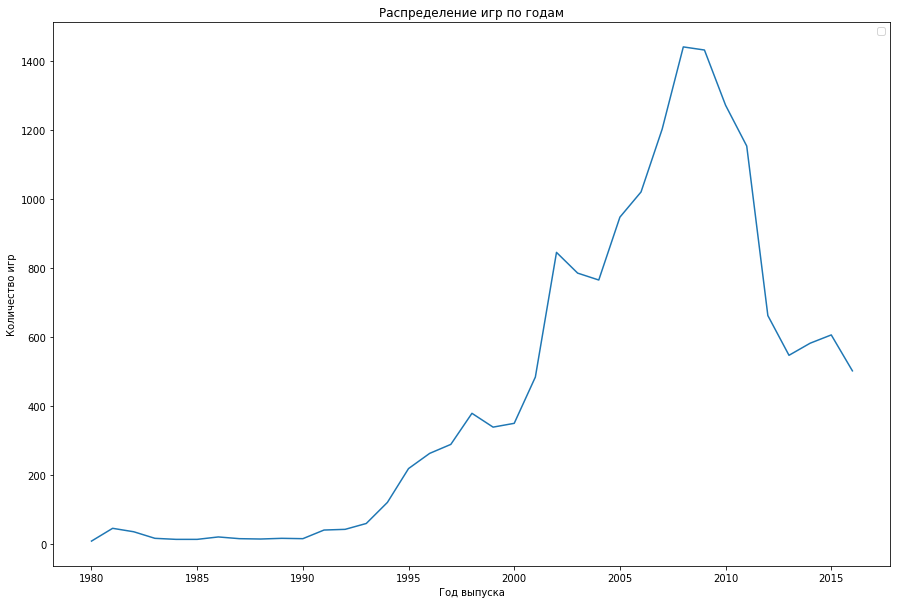

In [11]:
games['year_of_release'].value_counts()
games_on_period = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
#display(games_on_period)
sales = games.groupby('year_of_release')[['total_sales']].sum()
sales_com =sales.merge(games_on_period, on='year_of_release', how='right')
display(sales_com)
plt.figure(figsize=(15,10))
sns.lineplot(data=games_on_period)
plt.title("Распределение игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество игр")
plt.legend('')

Как мы видим, с 1994 года количество выпускаемых игр начало расти, а потом после 2008 года начало снижаться

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

ps2     2140
ds      2129
ps3     1320
wii     1301
x360    1250
psp     1203
ps      1190
pc       970
xb       817
gba      813
gc       552
3ds      515
psv      429
ps4      392
n64      318
xone     247
snes     239
sat      173
wiiu     147
2600     117
nes       98
gb        97
dc        52
gen       27
ng        12
scd        6
ws         6
3do        3
tg16       2
pcfx       1
gg         1
Name: platform, dtype: int64

Text(0, 0.5, 'Количество продаж')

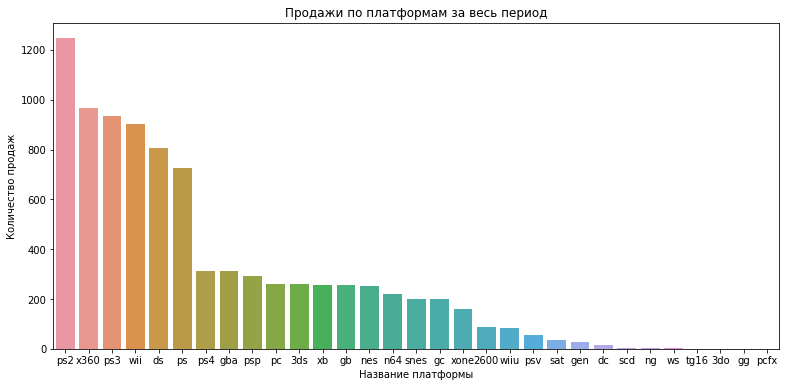

In [12]:
#Посмотрим, какие платформы для игры имеются
display(games['platform'].value_counts())
#посмотрим на платформы по продажам.
platform_sales = games.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=platform_sales.index,y=platform_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Таким образом, у нас есть 6 платформ, которые больше всего продали:  ps2, x360, ps3, wii, ds, ps. 

Определим, за какой характерный срок появляются новые и исчезают старые платформы.

In [13]:
years_platform = games.groupby('year_of_release')[['platform']].count()
#sales_com =sales.merge(games_on_period, on='year_of_release', how='right')
display(years_platform)

,platform
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Возьмем данные за актуальный период, который сначала конкретизируем.

In [14]:
games_platform_year=games.pivot_table(index ='year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
games_platform_year.head(60)
#Ограничим таблицу для анализа от 1997 года, когда наметился явный рост
games_platform_year_sorted=games.loc[games['year_of_release']>1996]
games_platform_year_sorted=games_platform_year_sorted.pivot_table(index ='platform', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
display(games_platform_year_sorted)
#Анализ показывает, что актуальным периодом для исследования можно считать данные с 2013 года, ограничим таблицу.
games = games.loc[games['year_of_release']>2012]
games.sample(10)

year_of_release,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,
2600,NaN,NaN,NaN,NaN,NaN,2.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3ds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.32,63.20,51.76,56.57,43.76,27.78,15.14
dc,NaN,3.38,5.16,5.99,1.07,0.29,NaN,NaN,NaN,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,130.14,119.81,147.23,145.36,119.56,85.35,26.33,11.67,1.54,NaN,NaN,NaN
gb,6.37,26.90,38.00,19.76,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gba,NaN,NaN,NaN,0.07,61.53,74.16,56.67,77.91,34.53,5.46,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gc,NaN,NaN,NaN,NaN,26.62,52.22,51.20,28.89,27.91,11.55,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n64,39.50,49.24,58.01,33.97,3.25,0.08,NaN,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pc,11.27,3.26,4.74,4.66,5.47,8.57,8.89,10.39,4.38,2.85,9.28,12.46,17.05,26.15,35.16,23.45,12.66,13.63,8.52,5.25


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2315,skylanders: trap team,x360,2014,action,0.54,0.27,0.00,0.08,0,0.0,e10+,0.89
15049,tv anime idolm@ster: cinderella girls g4u! pac...,ps3,2015,action,0.00,0.00,0.02,0.00,0,0.0,NaN,0.02
6795,samurai warriors 4,ps4,2014,action,0.08,0.07,0.06,0.03,76,8.1,t,0.24
14375,song of the deep,pc,2016,action,0.03,0.00,0.00,0.00,73,6.3,e,0.03
16510,art academy: home studio,wiiu,2015,misc,0.00,0.00,0.01,0.00,82,8.3,e,0.01
16460,young justice: legacy,x360,2013,action,0.00,0.01,0.00,0.00,0,6.2,t,0.01
271,fifa 14,x360,2013,sports,0.92,2.89,0.01,0.40,84,4.2,e,4.22
12470,transformer: rise of the dark spark,wiiu,2014,action,0.04,0.01,0.00,0.01,0,0.0,NaN,0.06
6945,girls mode 3: kirakira code,3ds,2015,action,0.00,0.00,0.23,0.00,0,0.0,NaN,0.23
6267,grid 2,x360,2013,racing,0.08,0.16,0.00,0.03,78,5.8,e,0.27


- Практически все игровые платформы в среднем существуют по 8-10 лет. 
- Самый пик наступает примерно в середине периода существования через 3-5 лет после выхода приставки
- Cамые продаваемые это Sony Play Station, которые меняют версии, до того как предыдущая выйдет в тираж
- у Nintento WII был быстрый скачок в 2006 году и такой же резкий провал с 2012 года
- Игры для персонального компьютера продаются на всем сроке и увеличивают свои продажи после 2008 года, когда остальные идут на спад
- Поскольку после 2013 года наблюдается спад продаж, то возьмем за актуальный период с 2013 по 2016 г.

Выберем несколько потенциально прибыльных платформ.

Text(0, 0.5, 'Количество продаж')

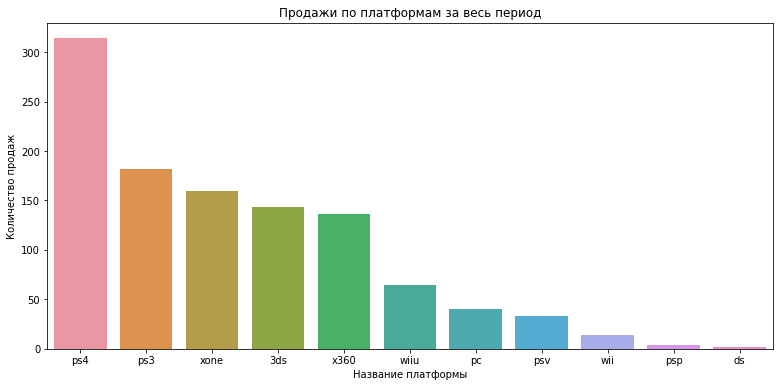

In [15]:
# посмотрим, как изменился график прибыльности платформ в актуальном периоде
platform_sales = games.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=platform_sales.index,y=platform_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

In [16]:
list_of_top6 = ['3ds','x360','ps3','wiiu','xone', 'ps4']
game_top_6_platforms = games[games['platform'].isin(['3ds','x360','ps3','wiiu','xone', 'ps4'])]
game_top_6_platforms = game_top_6_platforms[game_top_6_platforms['total_sales']<1.4]

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Text(0, 0.5, 'Глобальные продажи')

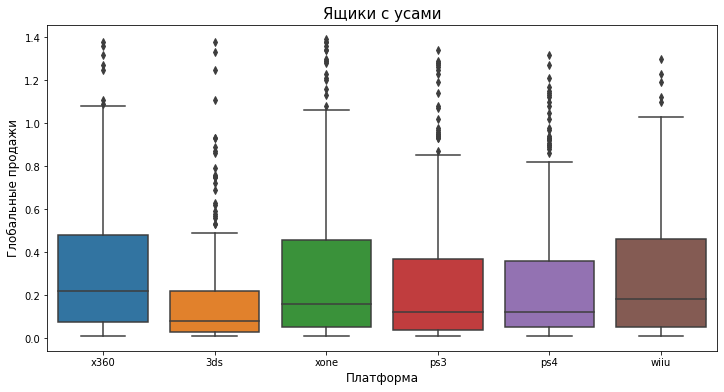

In [17]:
#Построим графики "ящики с усами" 
plt.figure(figsize=(12,6))
sns.boxplot(data=game_top_6_platforms, x='platform', y='total_sales')
plt.title('Ящики с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

- Исходя из графиков видно, что медиана протекает у всех по-разному
- Больше всех продаж у X360, затем PS3 и PS4, после почти на одном уровне WII, 3DS и DS. 

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [18]:
#Корреляция между оценками пользователей и продажами 
sony_play_station4 = games[games['platform']=='ps4']
print(sony_play_station4['user_score'].corr(sony_play_station4['total_sales']))
#для сравнения возьмем платформу не из топа, а из середины по продажам, например, xb
pc_platform = games[games['platform']=='pc']
print(pc_platform['user_score'].corr(pc_platform['total_sales']))
#для сравнения возьмем платформу ближе к концу
ds_platform = games[games['platform']=='ds']
print(ds_platform['user_score'].corr(ds_platform['total_sales']))


0.11311562450852881
0.042550393380014435
0.44040757146749465


Как мы видим, корреляция между этими показателями больше  у платформы с меньшими продажами, чем у платформы из топа или из середины списка

Text(0.5, 1.0, 'ds_platform')

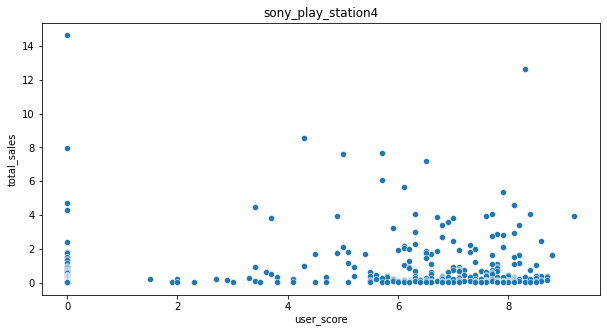

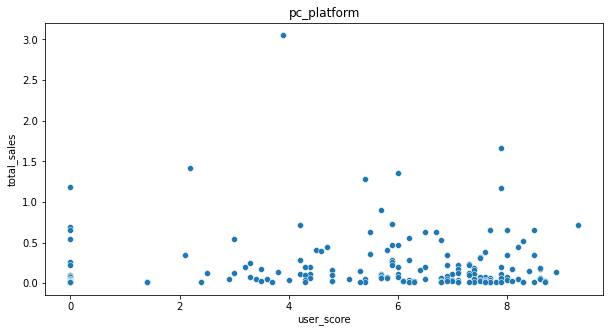

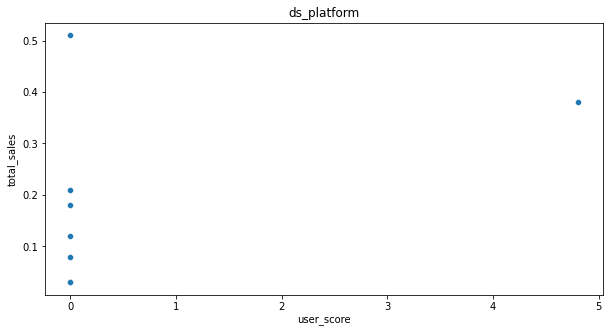

In [19]:
#Построим диаграмму рассеяния для платформы из топа
plt.figure(figsize=(10,5))
sns.scatterplot(x='user_score', y='total_sales', data=sony_play_station4)
plt.title('sony_play_station4')
#Построим диаграмму рассеяния для платформы из середины листа
plt.figure(figsize=(10,5))
sns.scatterplot(x='user_score', y='total_sales', data=pc_platform)
plt.title('pc_platform')
#Построим диаграмму рассеяния для платформы ближе к концу листа
plt.figure(figsize=(10,5))
sns.scatterplot(x='user_score', y='total_sales', data=ds_platform)
plt.title('ds_platform')

С диаграммами рассеяния ситуация похожая на показатели с оценкой пользователей.

In [20]:
#Корреляция между оценками пользователей и продажами 
sony_play_station4 = games[games['platform']=='ps4']
print(sony_play_station4['critic_score'].corr(sony_play_station4['total_sales']))
#для сравнения возьмем платформу не из топа, а из середины по продажам, например, xb
pc_platform = games[games['platform']=='pc']
print(pc_platform['critic_score'].corr(pc_platform['total_sales']))
#для сравнения возьмем платформу ближе к концу
ds_platform = games[games['platform']=='ds']
print(ds_platform['critic_score'].corr(ds_platform['total_sales']))

0.22754960627752652
0.18664907593915292
nan


Как мы видим, оценка критиков больше влияет на выделение топа и на отнесение платформы ближе к концу списка

Text(0.5, 1.0, 'ds_platform')

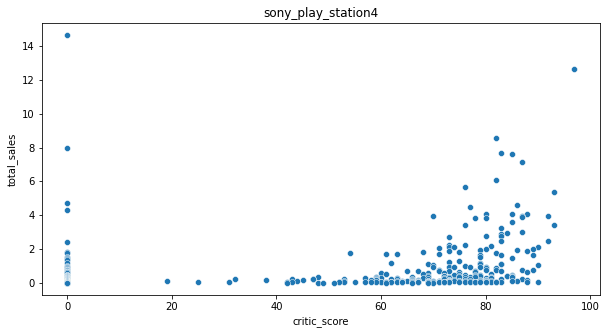

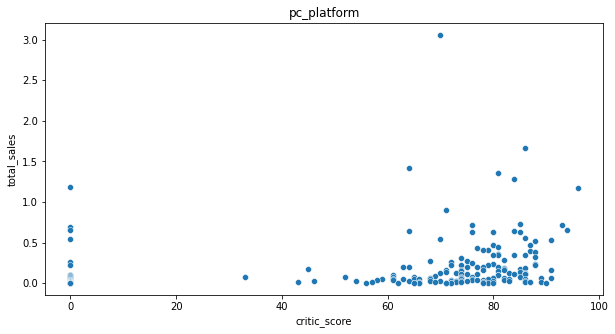

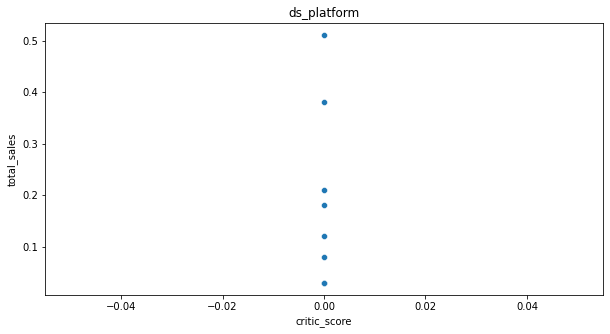

In [21]:
#Построим диаграмму рассеяния для платформы из топа
plt.figure(figsize=(10,5))
sns.scatterplot(x='critic_score', y='total_sales', data=sony_play_station4)
plt.title('sony_play_station4')
#Построим диаграмму рассеяния для платформы из середины листа
plt.figure(figsize=(10,5))
sns.scatterplot(x='critic_score', y='total_sales', data=pc_platform)
plt.title('pc_platform')
#Построим диаграмму рассеяния для платформы ближе к концу листа
plt.figure(figsize=(10,5))
sns.scatterplot(x='critic_score', y='total_sales', data=ds_platform)
plt.title('ds_platform')

Диаграммы рассеяния у платформы из топа и платформы из середины списка похожи, в отличие от платформы ближе к концу списка

In [22]:
#Напишем функцию для графиков рассеивания и подсчета корреляций
def cor_matrix(name_of_platform):
    platform = games[games['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=10)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    user_correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и продажами ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и продажами ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и продажами ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и продажами ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и продажами ', name_of_platform.upper(), ': Сильная', critic_correl)
    
    if 0.3 >= user_correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', user_correl)
    if 0.5 >= user_correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', user_correl)
    if 0.7 >= user_correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', user_correl)
    if 0.9 >= user_correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', user_correl)
    if 1 >= user_correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', user_correl)
    print('\n')

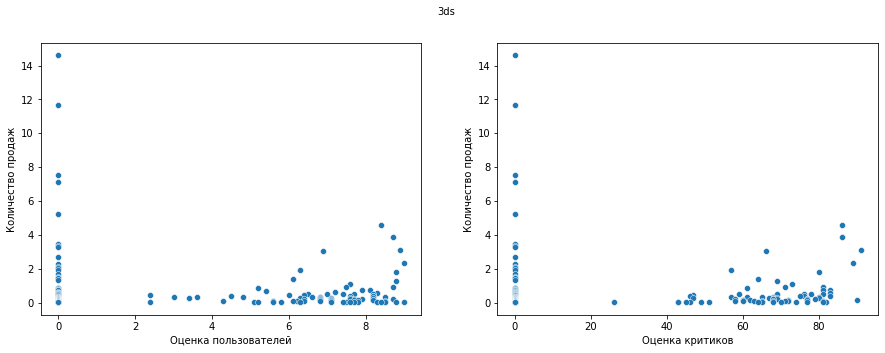

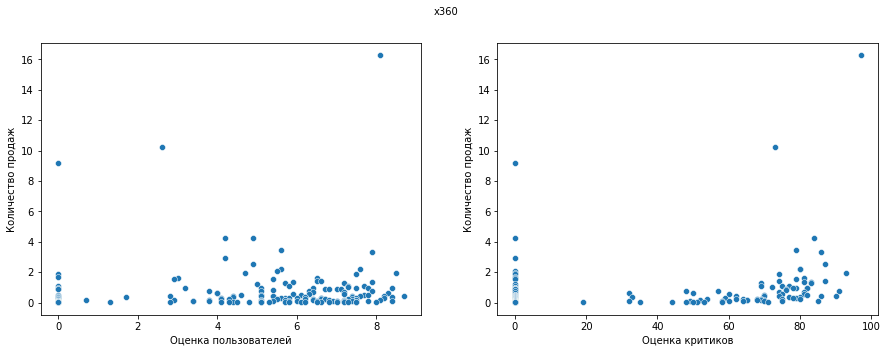

Корреляция между отзывами критиков и продажами  X360 : Слабая 0.24657276701675537




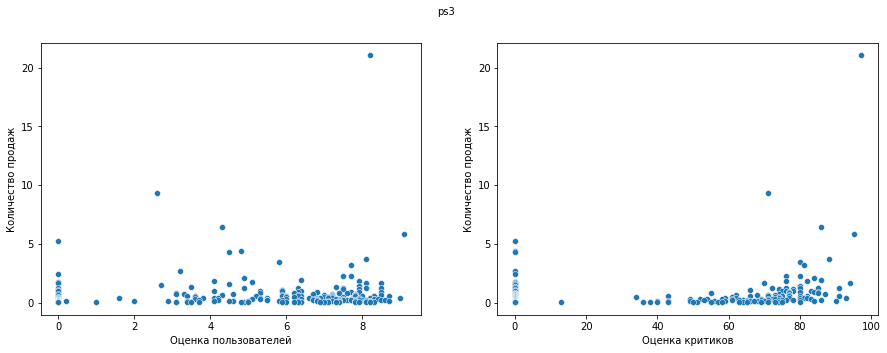

Корреляция между отзывами критиков и продажами  PS3 : Слабая 0.27927436323247207
Корреляция между отзывами пользователей и продажами  PS3 : Слабая 0.20209116183305234




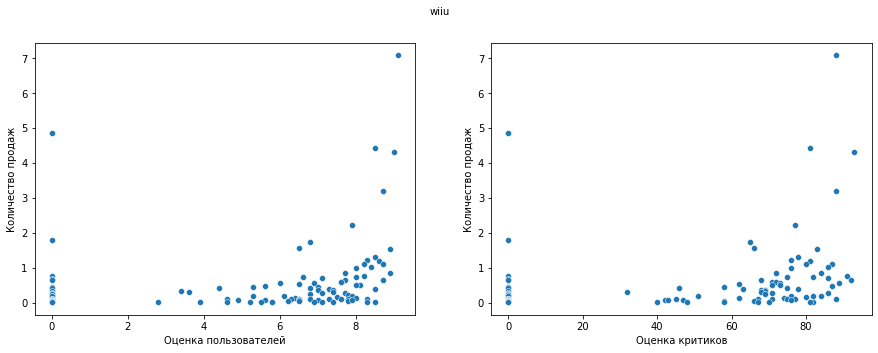

Корреляция между отзывами критиков и продажами  WIIU : Слабая 0.29414849692289996
Корреляция между отзывами пользователей и продажами  WIIU : Слабая 0.25281062812538624




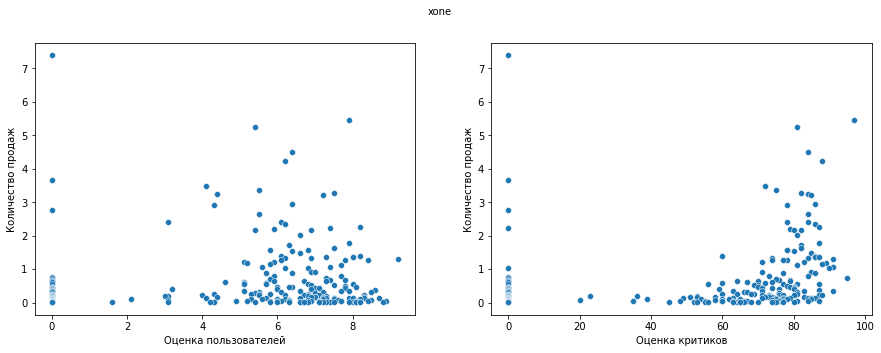

Корреляция между отзывами критиков и продажами  XONE : Слабая 0.2748391874944539
Корреляция между отзывами пользователей и продажами  XONE : Слабая 0.11656261405851895




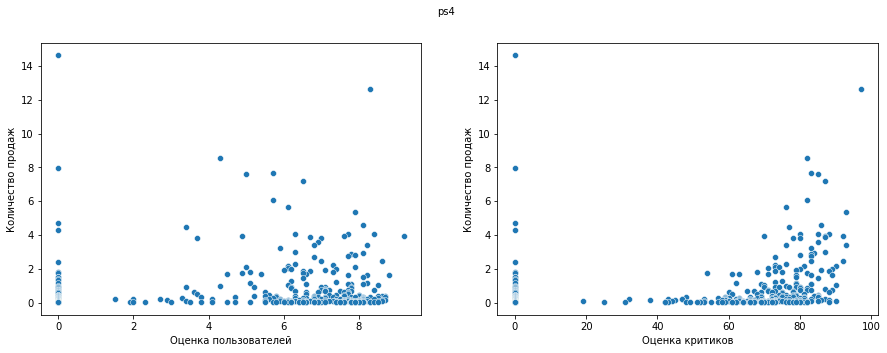

Корреляция между отзывами критиков и продажами  PS4 : Слабая 0.22754960627752652
Корреляция между отзывами пользователей и продажами  PS4 : Слабая 0.11311562450852881




In [23]:
#Посмотрим на корреляции и диаграммы рассеяния для топа:
for platform in list_of_top6:
    cor_matrix(platform)

Посмотрим на общее распределение игр по жанрам. Определим самые прибыльные жанры и те, которые с низкими продажами

In [24]:
#games.pivot_table(index ='genre', columns = '', values = 'total_sales', aggfunc = ['sum', 'mean', 'median'])
games_genre_sum = games.groupby('genre')[['total_sales']].sum()
games_genre_mean = games.groupby('genre')[['total_sales']].mean()
games_genre_median = games.groupby('genre')[['total_sales']].median()
games_genre= games_genre_sum.merge(games_genre_mean, on = 'genre')
games_genre= games_genre.merge(games_genre_median, on = 'genre')
games_genre

,total_sales_x,total_sales_y,total_sales
genre,,,
action,322.50,0.419376,0.110
adventure,23.64,0.096490,0.030
fighting,35.31,0.441375,0.125
misc,63.06,0.404231,0.105
platform,42.63,0.576081,0.225
puzzle,3.17,0.186471,0.060
racing,39.89,0.469294,0.120
role-playing,145.89,0.499623,0.125
shooter,232.98,1.245882,0.450


Чаще всего по сумме продаж продаются action, sports, shooter, меньше всего продаются strategy, adventure и puzzle. По среднему арифметическому shooter, platform, sports, по медиане shooter, sports, platform. Shooter по всем показателям приносит стабильно высокий доход	

In [25]:
games_platform_genre=games.pivot_table(index ='platform', columns = 'genre', values = 'total_sales', aggfunc = 'sum')
games_platform_genre.head(15)

genre,action,adventure,fighting,misc,platform,puzzle,racing,role-playing,shooter,simulation,sports,strategy
platform,,,,,,,,,,,,
3ds,34.04,3.33,8.21,7.10,8.79,1.73,NaN,67.37,0.06,9.53,1.82,1.27
ds,0.50,0.03,NaN,0.08,0.69,NaN,NaN,NaN,NaN,0.21,0.03,NaN
pc,7.89,0.51,0.10,0.71,0.07,NaN,0.97,4.87,9.84,8.11,1.96,5.03
ps3,70.92,4.32,6.05,8.36,3.33,0.04,6.46,16.49,31.79,0.71,32.35,0.61
ps4,96.10,6.34,8.65,8.19,7.69,0.02,12.14,28.99,88.56,1.23,55.61,0.62
psp,0.86,0.71,0.02,0.41,NaN,NaN,NaN,1.03,NaN,NaN,0.69,0.02
psv,9.72,3.45,1.19,3.85,0.47,0.06,0.10,10.23,1.44,0.05,2.08,0.35
wii,2.82,0.18,NaN,7.06,2.25,NaN,NaN,NaN,NaN,0.14,0.95,0.26
wiiu,14.75,0.17,6.09,7.38,16.27,1.32,7.36,1.93,5.48,0.20,2.46,1.22


Составим портрет пользователя каждого региона (NA, EU, JP). Определим самые популярные платформы (топ-5) и выявим различия в долях продаж.

In [26]:
games_NA = games.loc[games['na_sales'] > 0]
games_NA_platform =games_NA.groupby('platform')[['na_sales']].sum()
display(games_NA_platform.sort_values(by='na_sales', ascending=False))
games_EU = games.loc[games['eu_sales'] > 0]
games_EU_platform = games_EU.groupby('platform')[['eu_sales']].sum()
display(games_EU_platform.sort_values(by='eu_sales', ascending=False))
games_JP = games.loc[games['jp_sales'] > 0]
games_JP_platform = games_JP.groupby('platform')[['jp_sales']].sum()
display(games_JP_platform.sort_values(by='jp_sales', ascending=False))

,na_sales
platform,
ps4,108.74
xone,93.12
x360,81.66
ps3,63.50
3ds,38.20
wiiu,29.21
pc,11.19
wii,6.56
psv,5.04


,eu_sales
platform,
ps4,141.09
ps3,67.81
xone,51.59
x360,42.52
3ds,30.96
pc,25.84
wiiu,19.85
psv,6.10
wii,5.93


,jp_sales
platform,
3ds,67.81
ps3,23.35
psv,18.59
ps4,15.96
wiiu,10.88
psp,3.53
x360,0.51
xone,0.34
wii,0.05


Вывод: для Северной Америки топ выглядит так: ps4 108.74, xone 93.12, x360 81.66, ps3 63.50, 3ds 38.20
для Eвропы топ выглядит так: ps4 141.09, ps3 67.81, xone 51.59, x360 42.52, 3ds 30.96
для Японии топ выглядит так: 3ds 67.81, ps3 23.35, psv 18.59, ps4 15.96, wiiu 10.88
В состава топа для Северной Америки и Европы входят одни и те же платформы, но в разном порядке, а у JP список совпадает только на 3 платформы. 

Определите для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5).

In [27]:
games_NA_genre =games_NA.groupby('genre')[['na_sales']].sum()
display(games_NA_genre.sort_values(by='na_sales', ascending=False))
games_EU_genre =games_EU.groupby('genre')[['eu_sales']].sum()
display(games_EU_genre.sort_values(by='eu_sales', ascending=False))
games_JP_genre =games_JP.groupby('genre')[['jp_sales']].sum()
display(games_JP_genre.sort_values(by='jp_sales', ascending=False))

,na_sales
genre,
action,126.13
shooter,109.74
sports,65.27
role-playing,46.40
misc,27.49
platform,18.14
fighting,15.55
racing,12.96
adventure,7.14


,eu_sales
genre,
action,118.61
shooter,87.86
sports,60.52
role-playing,36.97
racing,20.19
misc,20.04
platform,15.58
simulation,10.92
fighting,8.55


,jp_sales
genre,
role-playing,51.04
action,40.49
misc,9.44
fighting,7.65
shooter,6.61
adventure,5.82
sports,5.41
platform,4.79
simulation,4.52


В Северной Америке и Eвропе набор жанров на первых 3 местах идентичен: action, sports, shooter (в порядке убывания), отличается 4 позиция platform и racing, 5 позиция, совпадает misc  
В Японии в набор входят те же жанры, но их порядок другой: role-playing, action, sports, platform, misc  

Определим для пользователя каждого региона (NA, EU, JP), влияет ли рейтинг ESRB на продажи в указанных регионах

,na_sales
rating,
m,165.29
e,79.05
e10+,54.24
t,49.79


,eu_sales
rating,
m,145.80
e,83.36
e10+,42.69
t,41.95


,jp_sales
rating,
t,20.59
e,15.14
m,14.11
e10+,5.89


Text(0, 0.5, 'Количество продаж')

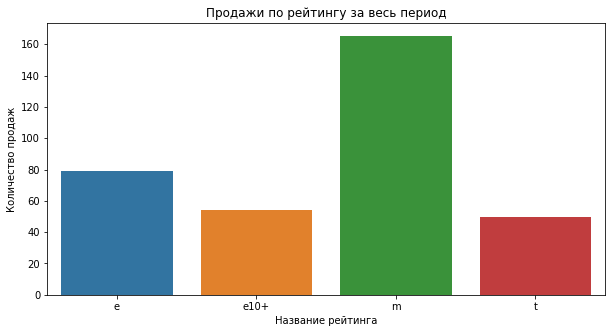

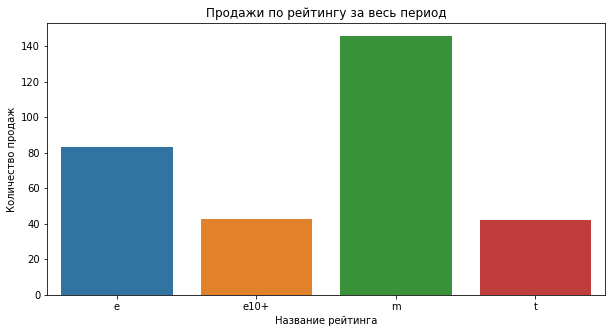

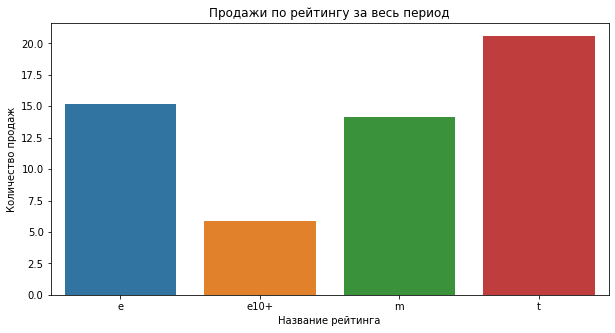

In [28]:
games_NA_rating =games_NA.groupby('rating')[['na_sales']].sum()
display(games_NA_rating.sort_values(by='na_sales', ascending=False))
#Построим гистограмму для NA
plt.figure(figsize=(10,5))
sns.barplot(x=games_NA_rating.index, y=games_NA_rating['na_sales'])
plt.title("Продажи по рейтингу за весь период")
plt.xlabel("Название рейтинга")
plt.ylabel("Количество продаж")

games_EU_rating =games_EU.groupby('rating')[['eu_sales']].sum()
display(games_EU_rating.sort_values(by='eu_sales', ascending=False))
#Построим гистограмму для EU
plt.figure(figsize=(10,5))
sns.barplot(x=games_EU_rating.index, y=games_EU_rating['eu_sales'])
plt.title("Продажи по рейтингу за весь период")
plt.xlabel("Название рейтинга")
plt.ylabel("Количество продаж")

games_JP_rating =games_JP.groupby('rating')[['jp_sales']].sum()
display(games_JP_rating.sort_values(by='jp_sales', ascending=False))
#Построим гистограмму для JP
plt.figure(figsize=(10,5))
sns.barplot(x=games_JP_rating.index, y=games_JP_rating['jp_sales'])
plt.title("Продажи по рейтингу за весь период")
plt.xlabel("Название рейтинга")
plt.ylabel("Количество продаж")

У Северной Америки и Европы продаются чаще игры по рейтингу "для взрослых",  "для всех" и "от 10 и выше", а у Японии другой рейтинг "от 13 и выше", "для всех", "для взрослых"

In [29]:
games_NA_2016 = games_NA.loc[games['year_of_release'] == 2016]
games_EU_2016 = games_EU.loc[games['year_of_release'] == 2016]
games_JP_2016 = games_JP.loc[games['year_of_release'] == 2016]

games_NA_2016_platform =games_NA_2016.groupby('platform')[['na_sales']].sum()
display(games_NA_platform.sort_values(by='na_sales', ascending=False))
games_EU_2016_platform = games_EU_2016.groupby('platform')[['eu_sales']].sum()
display(games_EU_platform.sort_values(by='eu_sales', ascending=False))
games_JP_2016_platform = games_JP_2016.groupby('platform')[['jp_sales']].sum()
display(games_JP_platform.sort_values(by='jp_sales', ascending=False))

,na_sales
platform,
ps4,108.74
xone,93.12
x360,81.66
ps3,63.50
3ds,38.20
wiiu,29.21
pc,11.19
wii,6.56
psv,5.04


,eu_sales
platform,
ps4,141.09
ps3,67.81
xone,51.59
x360,42.52
3ds,30.96
pc,25.84
wiiu,19.85
psv,6.10
wii,5.93


,jp_sales
platform,
3ds,67.81
ps3,23.35
psv,18.59
ps4,15.96
wiiu,10.88
psp,3.53
x360,0.51
xone,0.34
wii,0.05


In [30]:
games_NA_2016_genre =games_NA_2016.groupby('genre')[['na_sales']].sum()
display(games_NA_genre.sort_values(by='na_sales', ascending=False))
games_EU_2016_genre =games_EU_2016.groupby('genre')[['eu_sales']].sum()
display(games_EU_genre.sort_values(by='eu_sales', ascending=False))
games_JP_2016_genre =games_JP_2016.groupby('genre')[['jp_sales']].sum()
display(games_JP_genre.sort_values(by='jp_sales', ascending=False))

,na_sales
genre,
action,126.13
shooter,109.74
sports,65.27
role-playing,46.40
misc,27.49
platform,18.14
fighting,15.55
racing,12.96
adventure,7.14


,eu_sales
genre,
action,118.61
shooter,87.86
sports,60.52
role-playing,36.97
racing,20.19
misc,20.04
platform,15.58
simulation,10.92
fighting,8.55


,jp_sales
genre,
role-playing,51.04
action,40.49
misc,9.44
fighting,7.65
shooter,6.61
adventure,5.82
sports,5.41
platform,4.79
simulation,4.52


За 2016 год изменился жанровый набор на 4 и 5 позициях в Северной Америке misc, racing, в Европе наоборот, а в Японии misc, platform

In [31]:
games_NA_2016_rating =games_NA_2016.groupby('rating')[['na_sales']].sum()
display(games_NA_rating.sort_values(by='na_sales', ascending=False))
games_EU_2016_rating =games_EU_2016.groupby('rating')[['eu_sales']].sum()
display(games_EU_rating.sort_values(by='eu_sales', ascending=False))
games_JP_2016_rating =games_JP_2016.groupby('rating')[['jp_sales']].sum()
display(games_JP_rating.sort_values(by='jp_sales', ascending=False))

,na_sales
rating,
m,165.29
e,79.05
e10+,54.24
t,49.79


,eu_sales
rating,
m,145.80
e,83.36
e10+,42.69
t,41.95


,jp_sales
rating,
t,20.59
e,15.14
m,14.11
e10+,5.89


За 2016 год поменялся местами жанровый набор на 2 и 3 позициях в Северной Америке и в Европе. Остальные показатели остались такими же как на основной выборке по актуальному периоду. Значит, можно оценивать успешность игр и платформ по актуальному периоду, а не по одному последнему году, что видно и по продажам по всем регионам сразу.

Сформулируем нулевую и альтернативную гипотезы:

  Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [32]:
# Сохраним в переменных xbox_games и pc_games актуальные данные за последние 10 лет
games = games.query('user_score != 0')
xone_games = games[games['platform']=='xone']['user_score']
pc_games = games[games['platform']=='pc']['user_score']

#Посчитаем средний рейтинг пользователя для xbox платформ
print('средний рейтинг пользователя для xbox платформ', xone_games.mean())
#Посчитаем средний рейтинг пользователя для PC платформ
print('средний рейтинг пользователя для PC платформ', pc_games.mean())

средний рейтинг пользователя для xbox платформ 6.521428571428572
средний рейтинг пользователя для PC платформ 6.280379746835442


In [33]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(xone_games.dropna(), pc_games.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Опровергаем нулевую гипотезу")
else:
    print("Не получилось опровергнуть нулевую гипотезу")

p-значение: 0.16174359801784308
Не получилось опровергнуть нулевую гипотезу


Не получилось опровергнуть нашу нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните: Как вы сформулировали нулевую и альтернативную гипотезы; Какой критерий применили для проверки гипотез и почему.

Сформулируем нулевые гипотезы:

Нулевая гипотеза: Средние пользовательские рейтинги жанров action и sports одинаковые;
  Альтернативная гипотеза: Средние пользовательские рейтинги жанров action и sports различаются

In [34]:
# Сохраним в переменных action_games и sports_games актуальные данные за последние 10 лет
action_games = games[games['genre']=='action']['user_score']
sports_games = games[games['genre']=='sports']['user_score']

#Посчитаем средний рейтинг пользователя для жанрa action
print('средний рейтинг пользователя  для жанрa action', action_games.mean())
#Посчитаем средний рейтинг пользователя для жанрa sports
print('средний рейтинг пользователя для жанрa sports', sports_games.mean())

средний рейтинг пользователя  для жанрa action 6.8375
средний рейтинг пользователя для жанрa sports 5.238124999999999


In [35]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(action_games.dropna(), sports_games.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Опровергаем нулевую гипотезу")
else:
    print("Не получилось опровергнуть нулевую гипотезу")

p-значение: 1.3883444596405356e-20
Опровергаем нулевую гипотезу


Нулевая гипотеза о схожести средних пользовательских рейтингов жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не подтвердилась. 

Общий вывод:

Были проверены данные, скорректированы типы и подготовлены к исследованию, для чего были сделаны соответствующие сводные таблицы.

Количество игр начало расти с большой скоростью после 1994 года до 2008 года. С 2008 года, продолжился рост только игр на персональных компьютеров, а для игровых платформ произошел резкий спад разработок игр.

Самые популярные игровые платформы: Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.

Средняя жизнь игровой платформы составляет 8-10 лет. Пик продаж наступает примерно через 3-5 лет после выхода приставки.

Больше всего продаются игры на Sony Playstation, у которой разработка новых релизов наступает на пике старых, и Xbox 360

Nintendo WII быстро появился и  быстро сошел на нет, так как появился поздно. 

У всех платформ наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Заметнее всего корреляция между оценками критиков и продажами. Видимо, для людей мнение критиков важнее мнения других пользователей

Чаще всего по сумме продаж продаются action, sports, shooter, меньше всего продаются strategy, adventure и puzzle. По среднему арифметическому shooter, platform, sports, по медиане shooter, sports, platform. Shooter по всем показателям приносит стабильно высокий доход. 

Вывод: для Северной Америки топ выглядит так: ps4 108.74, xone 93.12, x360 81.66, ps3 63.50, 3ds 38.20
для Eвропы топ выглядит так: ps4 141.09, ps3 67.81, xone 51.59, x360 42.52, 3ds 30.96
для Японии топ выглядит так: 3ds 67.81, ps3 23.35, psv 18.59, ps4 15.96, wiiu 10.88
В состава топа для Северной Америки и Европы входят одни и те же платформы, но в разном порядке, а у JP список совпадает только на 3 платформы.

В Северной Америке и Eвропе набор жанров на первых 3 местах идентичен: action, sports, shooter (в порядке убывания), отличается 4 позиция platform и racing, 5 позиция, совпадает misc
В Японии в набор входят те же жанры, но их порядок другой: role-playing, action, sports, platform, misc 

У Северной Америки и Европы продаются чаще игры по рейтингу "для взрослых",  "для всех" и "от 10 и выше", а у Японии другой рейтинг "от 13 и выше", "для всех", "для взрослых".

За 2016 год поменялся местами жанровый набор на 2 и 3 позициях в Северной Америке и в Европе. Остальные показатели остались такими же как на основной выборке по актуальному периоду. Значит, можно оценивать успешность игр и платформ по актуальному периоду, а не по одному последнему году, что видно и по продажам по всем регионам сразу.

Результат по гипотезам таков:
Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". На актуальной выборке нулевая гипотеза была опровергнута. 
